### 【問題1】コンペティション内容の確認

##### 何を学習し、何を予測するのか
電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測
テストセット内のSK_ID_CURRごとに、TARGET変数の確率を予測

##### どのようなファイルを作りKaggleに提出するか
```
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
```
SK_ID_CURRはID、TARGETは確率

##### 提出されたものはどういった指標値で評価されるのか
AUC (ROC曲線下の面積)

### 【問題2】学習と検証
```
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。
検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。
```

In [66]:
# 分析

# データの準備
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_info_rows', 150)

df_base = pd.read_csv("../../data/home-credit-default-risk/application_train.csv")
x_names = np.array(["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED"])
y_name = "TARGET"
df = df_base.loc[:, np.append(x_names, y_name)]
# null処理 
df = df.dropna().reset_index(drop=True)
x = df.loc[:, x_names]
y = df[y_name]
display(df)

# 前処理
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

# 学習
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_p = lr.predict(x_valid)

# 検証
display(roc_auc_score(y_valid, lr_p))



,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,TARGET
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,1
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,0
...,...,...,...,...,...,...,...,...
307216,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,0
307217,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,0
307218,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,0
307219,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,1


0.5

### 【問題3】テストデータに対する推定

In [33]:
df_test = pd.read_csv("../../data/home-credit-default-risk/application_test.csv")
x_test = df_test.loc[:, x_names].fillna(0)
predict = lr.predict(x_test)

df_result = df_test.loc[:, ["SK_ID_CURR"]].join(pd.Series(predict, name='TARGET')).set_index('SK_ID_CURR')
df_result.to_csv('../../data/result/home-credit-default-risk.csv')
df_result

,TARGET
SK_ID_CURR,
100001,0
100005,0
100013,0
100028,0
100038,0
...,...
456221,0
456222,0
456223,0


### 【問題4】特徴量エンジニアリング

In [69]:
# パターン1: 単純に特徴量を増やす
x_names = [
    "DAYS_EMPLOYED", "REGION_RATING_CLIENT_W_CITY", "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "DAYS_BIRTH",
    "AMT_REQ_CREDIT_BUREAU_YEAR", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "OWN_CAR_AGE", "DAYS_ID_PUBLISH",
    "DEF_30_CNT_SOCIAL_CIRCLE", "FLAG_DOCUMENT_7", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"
]
y_name = "TARGET"
df = df_base.loc[:, np.append(x_names, y_name)]
df = df.dropna().reset_index(drop=True) # null処理 
x = df.loc[:, x_names]
y = df[y_name]

# 前処理
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

# 学習
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_p = lr.predict(x_valid)

# 検証
display(roc_auc_score(y_valid, lr_p))

# 結果: 変わらない

0.5

In [70]:
# パターン2: パターン1の特徴量を標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stdscl = scaler.transform(x_train)
x_valid_stdscl = scaler.transform(x_valid)

lr = LogisticRegression()
lr.fit(x_train_stdscl, y_train)
lr_p = lr.predict(x_valid_stdscl)

# 検証
display(roc_auc_score(y_valid, lr_p))

# 結果: 変わらない

0.5

In [71]:
# パターン3: アルゴリズムをLightGBM
import lightgbm as lgbm

lgb = lgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
lgb_p = lgb.predict(x_valid)

# 検証
display(roc_auc_score(y_valid, lgb_p))

# 結果: 0.1193上昇

0.6193119251151533

In [72]:
# パターン4: アルゴリズムをLightGBM + 特徴量標準化
from sklearn.preprocessing import StandardScaler
import lightgbm as lgbm
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stdscl = scaler.transform(x_train)
x_valid_stdscl = scaler.transform(x_valid)

lgb = lgbm.LGBMRegressor()
lgb.fit(x_train_stdscl, y_train)
lgb_p = lgb.predict(x_valid_stdscl)

# 検証
display(roc_auc_score(y_valid, lgb_p))

# 結果: 0.1179上昇

0.6179877113937878

In [74]:
# パターン5: アルゴリズムをKNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
knc_p = knc.predict(x_valid)
display(roc_auc_score(y_valid, knc_p))

# 結果: 0.001上昇

0.49931193609920144

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,0.013710,0.024877,0.028052,NaN,0.003892,0.014212,0.005647,-0.015447,0.007170,-0.023435,0.053614,0.061214,-0.013018,-0.005070,-0.000756,0.007449,0.003672,0.008242,0.001056,-0.129548,-0.130969,-0.150720,-0.028069,-0.018369,-0.009067,-0.026922,-0.013901,-0.025762,-0.006426,-0.046110,-0.032904,-0.007582,-0.028103,-0.025545,0.009610,-0.023182,-0.022803,-0.011255,-0.000480,-0.025116,...,-0.024423,-0.024207,0.013384,-0.018975,-0.026566,-0.017046,-0.012774,-0.026491,-0.013755,-0.024361,-0.005648,-0.045206,-0.033313,-0.007566,-0.026595,-0.024612,0.011152,-0.022205,-0.029714,0.031041,0.022807,0.030730,0.020796,0.019082,NaN,0.054269,NaN,-0.021425,-0.010312,0.021218,-0.012491,0.003951,-0.002752,-0.004221,-0.002752,-0.027218,-0.004330,0.005468,-0.021300,-0.003892,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
DAYS_EMPLOYED,-0.011304,0.062950,0.014600,-0.028260,-0.068760,-0.058623,-0.071172,0.004597,0.325117,1.000000,0.117245,0.079649,0.020314,NaN,0.002896,0.004602,0.001394,-0.040244,0.018322,-0.022648,-0.029713,-0.013937,0.031241,0.041839,0.064676,0.051610,0.059391,0.091709,0.074586,-0.213427,-0.095232,-0.146613,0.002382,-0.032919,-0.011422,-0.007556,-0.006956,0.005474,-0.032828,0.010997,0.010425,-0.009681,-0.003641,-0.006749,-0.009894,-0.006300,0.003114,-0.033168,-0.014638,-0.010878,...,-0.006133,-0.006938,-0.010828,-0.007310,0.002786,-0.032145,-0.005375,-0.006393,-0.006196,0.005026,-0.032276,0.010550,0.010019,-0.008592,-0.004096,-0.007584,-0.009409,-0.007432,-0.007309,0.007849,0.008560,0.007630,-0.000582,0.128299,NaN,-0.028240,NaN,-0.006559,-0.059299,-0.002835,0.013553,-0.001661,0.007201,0.024233,-0.028183,-0.011511,0.015571,0.018038,0.016421,0.011898,0.014636,0.014895,0.018351,0.001814,-0.001194,0.025302,0.004644,-0.014233,0.025230,-0.007192
REGION_RATING_CLIENT_W_CITY,-0.003637,0.061214,0.018380,-0.220782,-0.112522,-0.142749,-0.112101,-0.569545,0.044376,-0.013937,0.071296,-0.042658,0.083970,NaN,-0.001442,-0.003438,0.021167,-0.092321,-0.054135,0.027710,0.906178,1.000000,-0.271916,-0.056140,-0.

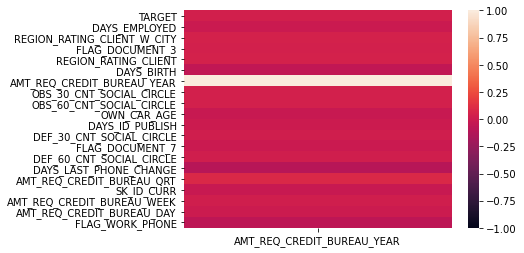

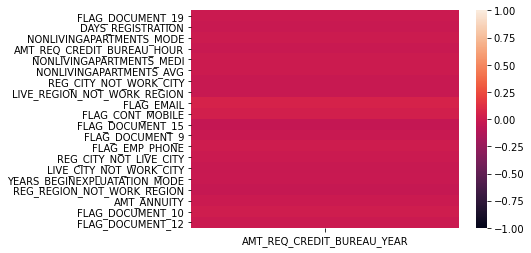

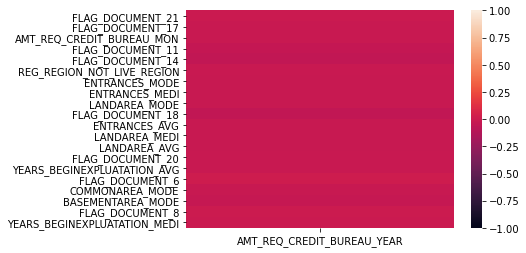

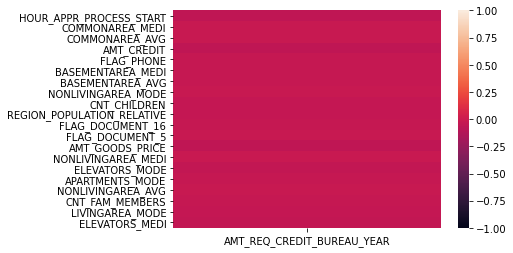

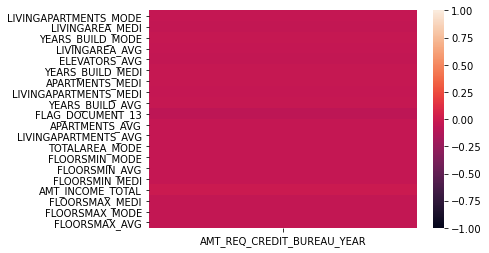

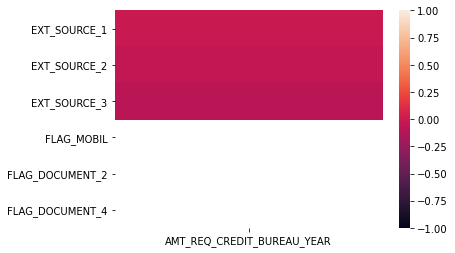

In [45]:
# 分析

import missingno as msno
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_info_rows', 150)


y_name = "TARGET"
df = df_base.dropna().reset_index(drop=True) # null処理 
x = df.drop(y_name, axis=1)
y = df[y_name]

df_corr = df.corr()
df_corr = df_corr.sort_values(y_name, ascending=False)
display(df_corr.head(100))

# ヒートマップ (y*全体)
sns.heatmap(df_corr.iloc[:20, [-1]], vmin=-1, vmax=1)
plt.show()
sns.heatmap(df_corr.iloc[20:40, [-1]], vmin=-1, vmax=1)
plt.show()
sns.heatmap(df_corr.iloc[40:60, [-1]], vmin=-1, vmax=1)
plt.show()
sns.heatmap(df_corr.iloc[60:80, [-1]], vmin=-1, vmax=1)
plt.show()
sns.heatmap(df_corr.iloc[80:100, [-1]], vmin=-1, vmax=1)
plt.show()
sns.heatmap(df_corr.iloc[100:120, [-1]], vmin=-1, vmax=1)
plt.show()





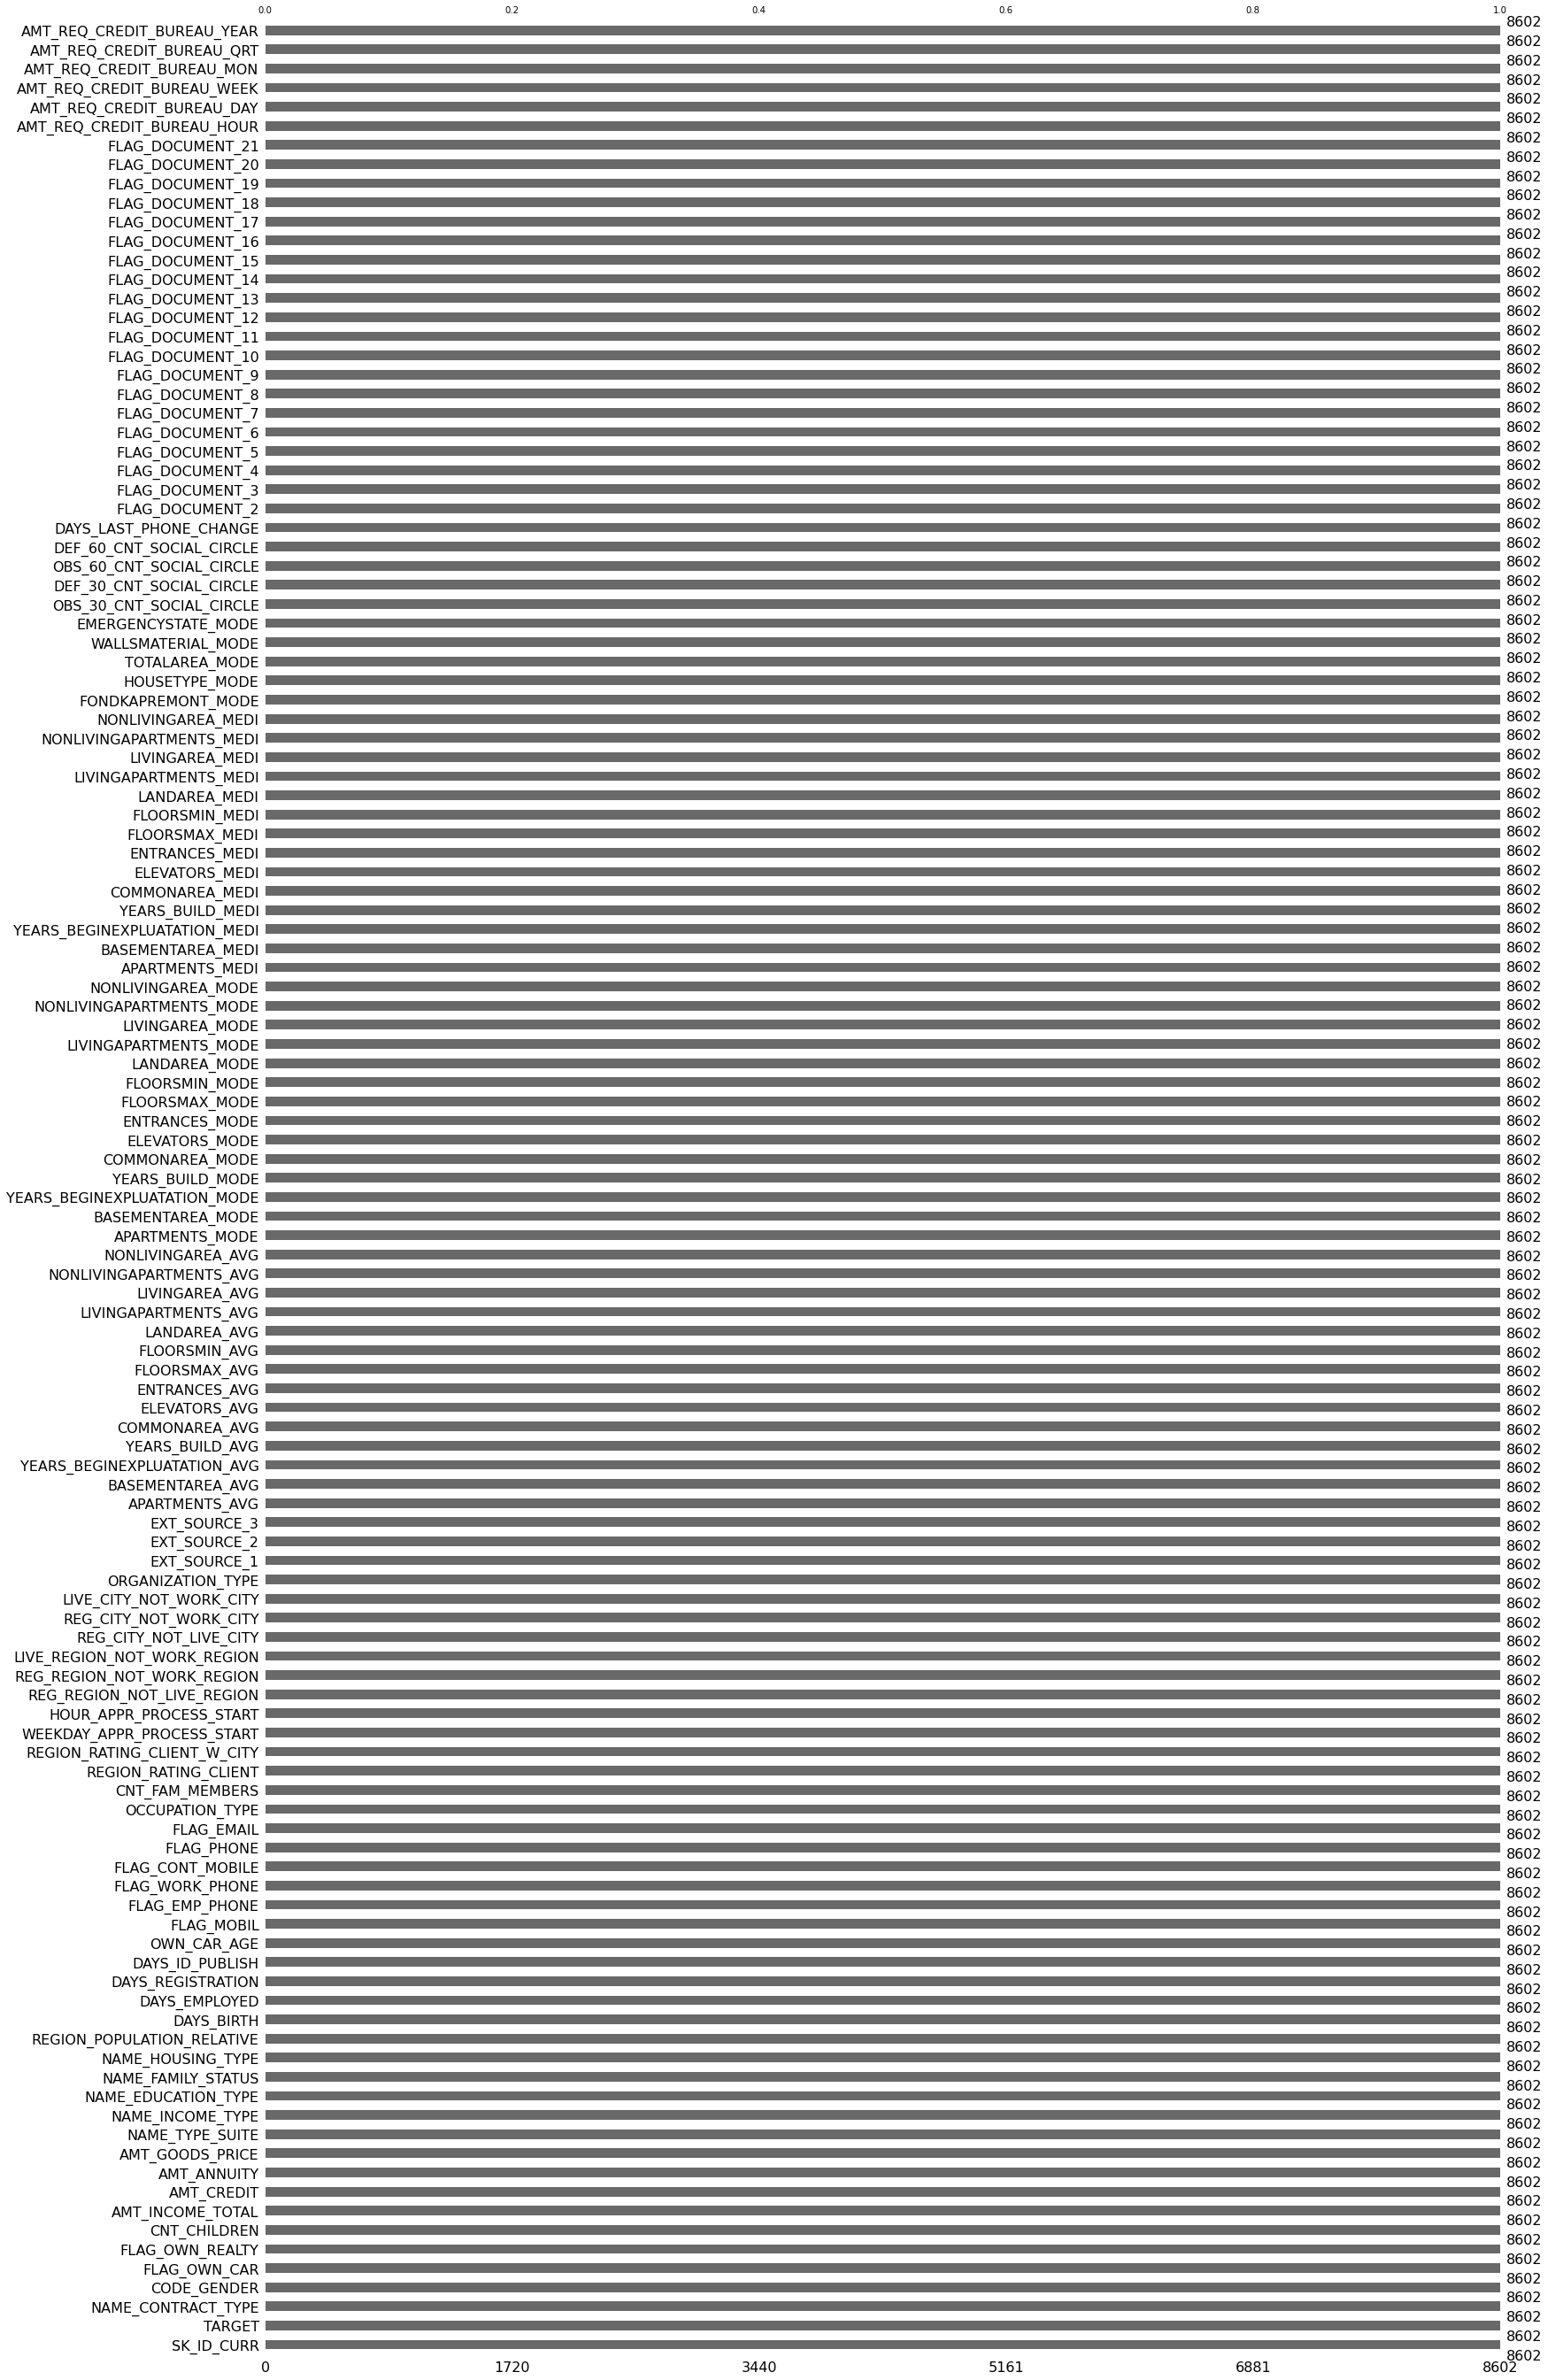

In [43]:
msno.bar(df)
plt.show()